In [1]:
#dependencies
import pandas as pd
import numpy as np
import pprint as pp
import json
import requests
import time
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [2]:
#import CSV that will be used to show correlation data
#url created as own column to cylce through the API
char_data = pd.read_csv('Smash Characters Win and Loss Rate.csv')
print(char_data)

                     Character      Char URL  Game Wins  Game Losses  \
0                       Bowser        bowser        513          558   
1                        Chrom         chrom        575          570   
2                        Daisy         daisy        179          225   
3                     Dark Pit       darkpit         54           81   
4                        Falco         falco        262          351   
5                          Fox           fox        984          988   
6                   Ganondorf      ganondorf        326          305   
7                     Greninja      greninja        584          648   
8                  Ice Climber   iceclimbers         90           89   
9                          Ike           ike        478          441   
10                  Incineroar    incineroar        201          268   
11                     Inkling       inkling       1111         1142   
12   Ivysaur (Pokemon Trainer)       ivysaur       1444         

In [3]:
#creating list to cycle through the API
char_name = char_data['Char URL'].values.tolist()
#pulling characters out that have a different API data response. Will attempt to clear the data later
char_name.remove("bowser")
char_name.remove("zelda")
char_name.remove("rob")
char_name.remove("wolf")
char_name.remove("fox")
char_name.remove("pit")
char_name.remove("iceclimbers")
char_name.remove("palutena")
char_name.remove('kingkrool')
char_name.remove('mewtwo')
char_name.remove('darkpit')
char_name.remove('falco')
char_name


['chrom',
 'daisy',
 'ganondorf',
 'greninja',
 'ike',
 'incineroar',
 'inkling',
 'ivysaur',
 'ken',
 'kirby',
 'littlemac',
 'lucina',
 'marth',
 'metaknight',
 'peach',
 'pichu',
 'piranhaplant',
 'richter',
 'ridley',
 'rosalinaluma',
 'roy',
 'ryu',
 'shulk',
 'simon',
 'snake',
 'squirtle',
 'wario']

In [4]:
#creating the lists that would be used to generate the dataframe based on accessible data
success_char = []
min_air_accel = []
air_accel_increase = []
max_air_accel = []
max_air_speed = []
max_fall_speed = []
fast_fall_speed =[]
speed_increase = []
initial_dash = []
walk_speed = []
weight = []
for character in char_name:
    try:
        url = "https://api.kuroganehammer.com/api/characters/name/" + str(character) +"/characterattributes?game=ultimate"
        response = requests.get(url).json()
        air_accel_increase.append(response[0]['Values'][0]['Value'])
        min_air_accel.append(response[0]['Values'][1]['Value'])
        max_air_accel.append(response[0]['Values'][2]['Value'])
        max_air_speed.append(response[1]['Values'][0]['Value'])
        max_fall_speed.append(response[2]['Values'][0]['Value'])
        fast_fall_speed.append(response[2]['Values'][1]['Value'])
        speed_increase.append(response[2]['Values'][2]['Value'])   
        initial_dash.append(response[3]['Values'][0]['Value'])
        walk_speed.append(response[4]['Values'][0]['Value'])
        weight.append(response[5]['Values'][0]['Value'])
        print(f' {character} stats added.')
        success_char.append(character)
#checks to see if the character is found
    except (KeyError):
        print(f' {character} not found, moving to next character.')
#in case character was found, but some data is missing        
    except (IndexError):
        print(f'stats not found for {character}!')

 chrom stats added.
 daisy stats added.
 ganondorf stats added.
 greninja stats added.
 ike stats added.
 incineroar stats added.
 inkling stats added.
 ivysaur stats added.
 ken stats added.
 kirby stats added.
 littlemac stats added.
 lucina stats added.
 marth stats added.
 metaknight stats added.
 peach stats added.
 pichu stats added.
 piranhaplant stats added.
 richter stats added.
 ridley stats added.
 rosalinaluma stats added.
 roy stats added.
 ryu stats added.
 shulk stats added.
 simon stats added.
 snake stats added.
 squirtle stats added.
 wario stats added.


In [5]:
#Bowser --pulling specific for this character, as it is different based on the API
bowser = "bowser"
url = "https://api.kuroganehammer.com/api/characters/name/bowser/characterattributes?game=ultimate"
response = requests.get(url).json()
try:
        #Min Air Acceleration
        min_air_accel.append(response[0]['Values'][0]['Value'])
        #Air Acceleration Increase
        air_accel_increase.append(response[0]['Values'][1]['Value'])
        #Max Air Acceleration
        max_air_accel.append(response[0]['Values'][2]['Value'])
        #Max Air Speed
        max_air_speed.append(response[6]['Values'][0]['Value'])
        #Max Fall Speed
        max_fall_speed.append(response[4]['Values'][0]['Value'])
        #Fast Fall Speed
        fast_fall_speed.append(response[4]['Values'][1]['Value'])
        #Speed Increase
        speed_increase.append(response[4]['Values'][2]['Value'])
        #Initial Dash
        initial_dash.append(response[7]['Values'][0]['Value'])
        #Walk Speed
        walk_speed.append(response[9]['Values'][0]['Value'])
        #Weight
        weight.append(response[10]['Values'][0]['Value'])
        print(f' {bowser} stats added.')
        success_char.append(bowser)
except (KeyError):
        print(f' {bowser} not found, moving to next character.')
except (IndexError):
        print(f'stats not found for {bowser}!')

 bowser stats added.


In [6]:
#Falco --pulling specific for this character, as it is different based on the API
url = "https://api.kuroganehammer.com/api/characters/name/Falco/characterattributes?game=ultimate"
response = requests.get(url).json()
try:
    air_accel_increase.append(response[0]['Values'][0]['Value'])
    min_air_accel.append(response[0]['Values'][1]['Value'])
    max_air_accel.append(response[0]['Values'][2]['Value'])
    max_air_speed.append(response[3]['Values'][0]['Value'])
    max_fall_speed.append(response[4]['Values'][0]['Value'])
    fast_fall_speed.append(response[4]['Values'][1]['Value'])
    speed_increase.append(response[4]['Values'][2]['Value'])
    initial_dash.append(response[7]['Values'][0]['Value'])
    success_char.append('falco')
    walk_speed.append(response[9]['Values'][0]['Value'])
    weight.append(response[12]['Values'][0]['Value'])
    print('Falco stats added.')
except (KeyError):
        print(f' Falco not found, moving to next character.')
except (IndexError):
        print(f'stats not found for Falco!')

Falco stats added.


In [7]:
#zelda,rob,palutena,kingkrool,mewtwo --pulling specific for this character, as it is different based on the API
odd_char_name = ['zelda', 'rob', 'palutena', 'kingkrool', 'mewtwo']
for character in odd_char_name:
    try:
        url = "https://api.kuroganehammer.com/api/characters/name/" + str(character) +"/characterattributes?game=ultimate"
        response = requests.get(url).json()
        air_accel_increase.append(response[0]['Values'][0]['Value'])
        min_air_accel.append(response[0]['Values'][1]['Value'])
        max_air_accel.append(response[0]['Values'][2]['Value'])
        max_air_speed.append(response[1]['Values'][0]['Value'])
        max_fall_speed.append(response[2]['Values'][0]['Value'])
        fast_fall_speed.append(response[2]['Values'][1]['Value'])
        speed_increase.append(response[2]['Values'][2]['Value'])
        initial_dash.append(response[4]['Values'][0]['Value'])
        success_char.append(character)
        walk_speed.append(response[5]['Values'][0]['Value'])
        weight.append(response[6]['Values'][0]['Value'])
        print(f' {character} stats added.')
    except (KeyError):
        print(f'{character} not found, moving to next character.')
    except (IndexError):
        print(f'stats not found for {character}!')

 zelda stats added.
 rob stats added.
 palutena stats added.
 kingkrool stats added.
 mewtwo stats added.


In [8]:
#confirm all the individual lists generated are the same length
print(len(success_char))
print(len(min_air_accel))
print(len(air_accel_increase))
print(len(max_air_accel))
print(len(max_air_speed))
print(len(max_fall_speed))
print(len(fast_fall_speed))
print(len(speed_increase))
print(len(initial_dash))
print(len(walk_speed))
print(len(weight))

34
34
34
34
34
34
34
34
34
34
34


In [9]:
#create dictionary based on the lists generated to be able to push into a datafram
character_dict = {'Char URL':success_char,
                  'min_air_accleration':min_air_accel,
                  'air_acceleration_increase':air_accel_increase,
                  'Max_air_acceleration':max_air_accel,
                  'Max_air_speed': max_air_speed,
                  'Max_fall_speed': max_fall_speed,
                  'fast_fall_speed': fast_fall_speed,
                  'speed_increase': speed_increase,
                  'Intial_dash': initial_dash,
                  'walk_speed':walk_speed,
                  'weight':weight
}


In [10]:
#push data into a datafram to be joined with our winrate data
char_df = pd.DataFrame(character_dict)
char_df

,Char URL,min_air_accleration,air_acceleration_increase,Max_air_acceleration,Max_air_speed,Max_fall_speed,fast_fall_speed,speed_increase,Intial_dash,walk_speed,weight
0,chrom,0.02,0.03,0.05,1.302,1.8,2.88,60%,2.2,1.208,95
1,daisy,0.04,0.08,0.12,1.029,1.19,1.904,60%,1.826,0.924,89
2,ganondorf,0.01,0.03,0.04,0.83,1.65,2.64,60%,1.87,0.767,118
3,greninja,0.01,0.07,0.08,1.239,1.85,2.96,60%,2.178,1.502,88
4,ike,0.01,0.04,0.05,1.134,1.65,2.64,60%,1.815,0.912,107
5,incineroar,0.01,0.06,0.07,0.88,1.76,2.816,60%,1.76,0.62,116
6,inkling,0.01,0.07,0.08,1.208,1.58,2.528,60%,2.118,1.134,94
7,ivysaur,0.01,0.085,0.095,0.998,1.38,2.208,60%,1.903,1.103,96
8,ken,0.01,0.025,0.035,1.12,1.6,2.24,40%,1.936,0.825,103
9,kirby,0.03,0.065,0.095,0.84,1.23,1.968,60%,1.9,0.977,79


In [11]:
char_df.to_csv(r'char_merge.csv')

In [12]:
#merge winrate data with the dataframe created
final_char_df = char_df.merge(char_data, on="Char URL")
final_char_df.set_index('Character')
#removing percentage sign in order to graph the data
colstocheck = final_char_df.columns
final_char_df[colstocheck] = final_char_df[colstocheck].replace({'%':''}, regex = True)
final_char_df

,Char URL,min_air_accleration,air_acceleration_increase,Max_air_acceleration,Max_air_speed,Max_fall_speed,fast_fall_speed,speed_increase,Intial_dash,walk_speed,weight,Character,Game Wins,Game Losses,Win Percentage
0,chrom,0.02,0.03,0.05,1.302,1.8,2.88,60,2.2,1.208,95,Chrom,575,570,50.20
1,daisy,0.04,0.08,0.12,1.029,1.19,1.904,60,1.826,0.924,89,Daisy,179,225,44.30
2,ganondorf,0.01,0.03,0.04,0.83,1.65,2.64,60,1.87,0.767,118,Ganondorf,326,305,51.70
3,greninja,0.01,0.07,0.08,1.239,1.85,2.96,60,2.178,1.502,88,Greninja,584,648,47.40
4,ike,0.01,0.04,0.05,1.134,1.65,2.64,60,1.815,0.912,107,Ike,478,441,52.00
5,incineroar,0.01,0.06,0.07,0.88,1.76,2.816,60,1.76,0.62,116,Incineroar,201,268,42.90
6,inkling,0.01,0.07,0.08,1.208,1.58,2.528,60,2.118,1.134,94,Inkling,1111,1142,49.30
7,ivysaur,0.01,0.085,0.095,0.998,1.38,2.208,60,1.903,1.103,96,Ivysaur (Pokemon Trainer),1444,1380,51.10
8,ken,0.01,0.025,0.035,1.12,1.6,2.24,40,1.936,0.825,103,Ken,147,178,45.20
9,kirby,0.03,0.065,0.095,0.84,1.23,1.968,60,1.9,0.977,79,Kirby,77,97,44.30


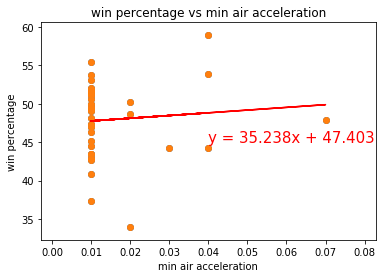

In [13]:
# graphing each individual 
y_values = final_char_df['Win Percentage']
x_values = final_char_df['min_air_accleration'].astype('float')

plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.04,45),fontsize=15,color="red")
plt.ylabel('win percentage')
plt.xlabel('min air acceleration')
plt.title('win percentage vs min air acceleration')
plt.savefig('Screenshots/min_air_accel.png')

In [14]:
#print correlation, standard deviation, pvalue
print(f'the correlation between the minimum air acceleration and win rate is {rvalue}')
print(f'the standard deviation between the minimum air acceleration and win rate is {rvalue*rvalue}')
print(f'the pvalue between the minimum air acceleration and win rate is {pvalue}')

the correlation between the minimum air acceleration and win rate is 0.09124695490489977
the standard deviation between the minimum air acceleration and win rate is 0.008326006779416813
the pvalue between the minimum air acceleration and win rate is 0.6077916849475764


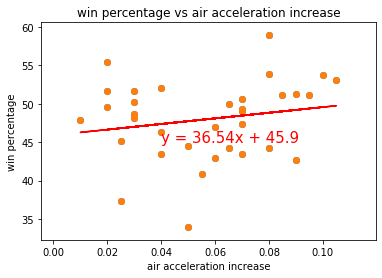

In [15]:
y_values = final_char_df['Win Percentage']
x_values = final_char_df['air_acceleration_increase'].astype('float')

plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.04,45),fontsize=15,color="red")
plt.ylabel('win percentage')
plt.xlabel('air acceleration increase')
plt.title('win percentage vs air acceleration increase')
plt.savefig('Screenshots/air_accel_incr.png')

In [16]:
print(f'the correlation between the air acceleration increase and win rate is {rvalue}')
print(f'the standard deviation between the air acceleration increase and win rate is {rvalue*rvalue}')
print(f'the pvalue between the air acceleration increase and win rate is {pvalue}')

the correlation between the air acceleration increase and win rate is 0.189563811173329
the standard deviation between the air acceleration increase and win rate is 0.03593443850655753
the pvalue between the air acceleration increase and win rate is 0.2829274131626914


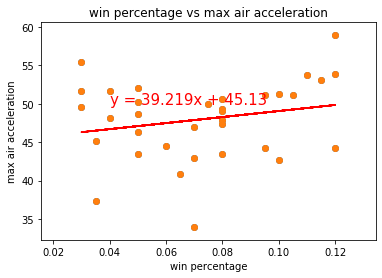

In [17]:
y_values = final_char_df['Win Percentage']
x_values = final_char_df['Max_air_acceleration'].astype('float')

plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.04,50),fontsize=15,color="red")
plt.xlabel('win percentage')
plt.ylabel('max air acceleration')
plt.title('win percentage vs max air acceleration')
plt.savefig('Screenshots/max_air_accel.png')

In [18]:
print(f'the correlation between the max air acceleration and win rate is {rvalue}')
print(f'the standard deviation between the max air acceleration and win rate is {rvalue*rvalue}')
print(f'the pvalue between the max air acceleration and win rate is {pvalue}')

the correlation between the max air acceleration and win rate is 0.21871485563970847
the standard deviation between the max air acceleration and win rate is 0.047836188077498516
the pvalue between the max air acceleration and win rate is 0.21396889855098386


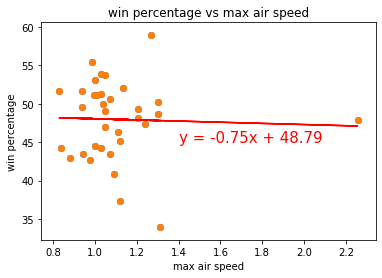

In [19]:
y_values = final_char_df['Win Percentage']
x_values = final_char_df['Max_air_speed'].astype('float')

plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.4,45),fontsize=15,color="red")

plt.ylabel('win percentage')
plt.xlabel('max air speed')
plt.title('win percentage vs max air speed')
plt.savefig('Screenshots/max_air_speed.png')

In [20]:
print(f'the correlation between the max air speed and win rate is {rvalue}')
print(f'the standard deviation between the max air speed and win rate is {rvalue*rvalue}')
print(f'the pvalue between the max air speed and win rate is {pvalue}')

the correlation between the max air speed and win rate is -0.035012962316060464
the standard deviation between the max air speed and win rate is 0.0012259075301458702
the pvalue between the max air speed and win rate is 0.8441542171073813


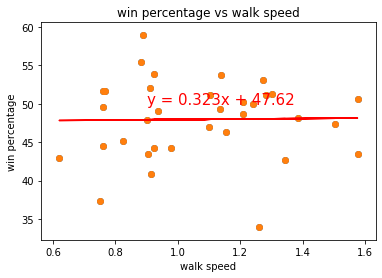

In [21]:
y_values = final_char_df['Win Percentage']
x_values = final_char_df['walk_speed'].astype('float')

plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.9,50),fontsize=15,color="red")
plt.ylabel('win percentage')
plt.xlabel('walk speed')
plt.title('win percentage vs walk speed')
plt.savefig('Screenshots/walk_speed.png')

In [22]:
print(f'the correlation between the walk speed and win rate is {rvalue}')
print(f'the standard deviation between the walk speed and win rate is {rvalue*rvalue}')
print(f'the pvalue between the walk speed and win rate is {pvalue}')

the correlation between the walk speed and win rate is 0.015935423641648974
the standard deviation between the walk speed and win rate is 0.00025393772663882504
the pvalue between the walk speed and win rate is 0.9287253473495998


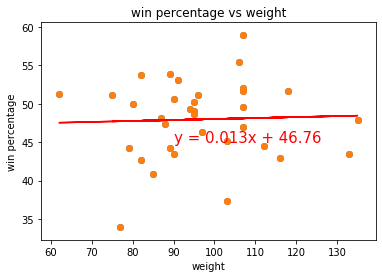

In [23]:
y_values = final_char_df['Win Percentage']
x_values = final_char_df['weight'].astype('float')

plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(90,45),fontsize=15,color="red")

plt.ylabel('win percentage')
plt.xlabel('weight')
plt.title('win percentage vs weight')
plt.savefig('Screenshots/weight.png')

In [24]:
print(f'the correlation between the walk speed and win rate is {rvalue}')
print(f'the standard deviation between the walk speed and win rate is {rvalue*rvalue}')
print(f'the pvalue between the walk speed and win rate is {pvalue}')

the correlation between the walk speed and win rate is 0.03845189510123973
the standard deviation between the walk speed and win rate is 0.001478548236876744
the pvalue between the walk speed and win rate is 0.8290622959731972


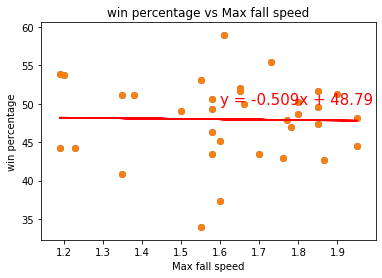

In [25]:
y_values = final_char_df['Win Percentage']
x_values = final_char_df['Max_fall_speed'].astype('float')

plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.6,50),fontsize=15,color="red")

plt.ylabel('win percentage')
plt.xlabel('Max fall speed')
plt.title('win percentage vs Max fall speed')
plt.savefig('Screenshots/max_fall_speed.png')

In [26]:
print(f'the correlation between the max fall speed and win rate is {rvalue}')
print(f'the standard deviation between the max fall speed and win rate is {rvalue*rvalue}')
print(f'the pvalue between the max fall speed and win rate is {pvalue}')

the correlation between the max fall speed and win rate is -0.021853247565460806
the standard deviation between the max fall speed and win rate is 0.00047756442915731866
the pvalue between the max fall speed and win rate is 0.9023656844301093


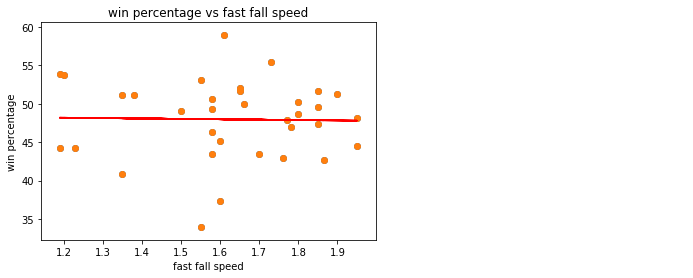

In [27]:
y_values = final_char_df['Win Percentage']
z_values = final_char_df['fast_fall_speed'].astype('float')

plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2.4,50),fontsize=15,color="red")

plt.ylabel('win percentage')
plt.xlabel('fast fall speed')
plt.title('win percentage vs fast fall speed')
plt.savefig('Screenshots/fast_fall_speed.png')

In [28]:
print(f'the correlation between the fast fall speed and win rate is {rvalue}')
print(f'the standard deviation between the fast fall speed and win rate is {rvalue*rvalue}')
print(f'the pvalue between the fast fall speed and win rate is {pvalue}')

the correlation between the fast fall speed and win rate is -0.021853247565460806
the standard deviation between the fast fall speed and win rate is 0.00047756442915731866
the pvalue between the fast fall speed and win rate is 0.9023656844301093


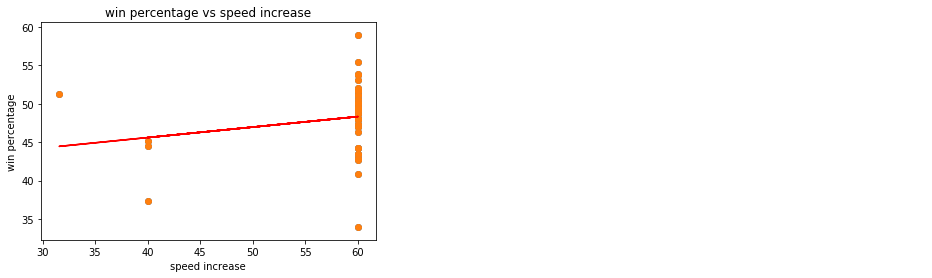

In [29]:
y_values = final_char_df['Win Percentage']
x_values = final_char_df['speed_increase'].astype('float')

plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,45),fontsize=15,color="red")

plt.ylabel('win percentage')
plt.xlabel('speed increase')
plt.title('win percentage vs speed increase')
plt.savefig('Screenshots/speed_increase.png')

In [30]:
print(f'the correlation between the speed increase and win rate is {rvalue}')
print(f'the standard deviation between the speed increase and win rate is {rvalue*rvalue}')
print(f'the pvalue between the speed increase and win rate is {pvalue}')

the correlation between the speed increase and win rate is 0.19453821047691874
the standard deviation between the speed increase and win rate is 0.03784511533556194
the pvalue between the speed increase and win rate is 0.27024954991901556


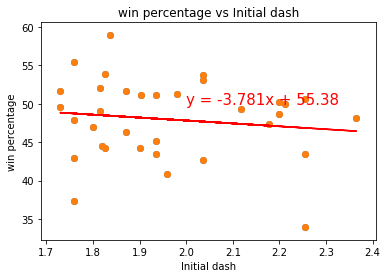

In [31]:
y_values = final_char_df['Win Percentage']
x_values = final_char_df['Intial_dash'].astype('float')

plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,50),fontsize=15,color="red")

plt.ylabel('win percentage')
plt.xlabel('Initial dash')
plt.title('win percentage vs Initial dash')
plt.savefig('Screenshots/initial_dash.png')

In [32]:
print(f'the correlation between the intial dash and win rate is {rvalue}')
print(f'the standard deviation between the intial dash and win rate is {rvalue*rvalue}')
print(f'the pvalue between the intial dash and win rate is {pvalue}')

the correlation between the intial dash and win rate is -0.135900257112974
the standard deviation between the intial dash and win rate is 0.018468879883372438
the pvalue between the intial dash and win rate is 0.4434660593092854
